In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# EDA
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

# SVM
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_test = pd.read_csv('SalaryData_Test.csv')
df_train = pd.read_csv('SalaryData_Train.csv')

In [3]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### EDA

In [5]:
df_train.shape

(30161, 14)

In [6]:
df_test.shape

(15060, 14)

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [9]:
#converting dtypes for train 
df_train['workclass']=df_train['workclass'].astype('category')
df_train['education']=df_train['education'].astype('category')
df_train['maritalstatus']=df_train['maritalstatus'].astype('category')
df_train['occupation']=df_train['occupation'].astype('category')
df_train['relationship']=df_train['relationship'].astype('category')
df_train['race']=df_train['race'].astype('category')
df_train['native']=df_train['native'].astype('category')
df_train['sex']=df_train['sex'].astype('category')


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            30161 non-null  int64   
 1   workclass      30161 non-null  category
 2   education      30161 non-null  category
 3   educationno    30161 non-null  int64   
 4   maritalstatus  30161 non-null  category
 5   occupation     30161 non-null  category
 6   relationship   30161 non-null  category
 7   race           30161 non-null  category
 8   sex            30161 non-null  category
 9   capitalgain    30161 non-null  int64   
 10  capitalloss    30161 non-null  int64   
 11  hoursperweek   30161 non-null  int64   
 12  native         30161 non-null  category
 13  Salary         30161 non-null  object  
dtypes: category(8), int64(5), object(1)
memory usage: 1.6+ MB


In [11]:
label_encoder=preprocessing.LabelEncoder()

In [12]:
df_train['workclass'] = label_encoder.fit_transform(df_train['workclass'])
df_train['education'] = label_encoder.fit_transform(df_train['education'])
df_train['maritalstatus'] = label_encoder.fit_transform(df_train['maritalstatus'])
df_train['occupation'] = label_encoder.fit_transform(df_train['occupation'])
df_train['relationship'] = label_encoder.fit_transform(df_train['relationship'])
df_train['race'] = label_encoder.fit_transform(df_train['race'])
df_train['sex'] = label_encoder.fit_transform(df_train['sex'])
df_train['native'] = label_encoder.fit_transform(df_train['native'])


In [13]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [14]:
#converting dtypes for test
df_test['workclass']=df_test['workclass'].astype('category')
df_test['education']=df_test['education'].astype('category')
df_test['maritalstatus']=df_test['maritalstatus'].astype('category')
df_test['occupation']=df_test['occupation'].astype('category')
df_test['relationship']=df_test['relationship'].astype('category')
df_test['race']=df_test['race'].astype('category')
df_test['native']=df_test['native'].astype('category')
df_test['sex']=df_test['sex'].astype('category')


In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            15060 non-null  int64   
 1   workclass      15060 non-null  category
 2   education      15060 non-null  category
 3   educationno    15060 non-null  int64   
 4   maritalstatus  15060 non-null  category
 5   occupation     15060 non-null  category
 6   relationship   15060 non-null  category
 7   race           15060 non-null  category
 8   sex            15060 non-null  category
 9   capitalgain    15060 non-null  int64   
 10  capitalloss    15060 non-null  int64   
 11  hoursperweek   15060 non-null  int64   
 12  native         15060 non-null  category
 13  Salary         15060 non-null  object  
dtypes: category(8), int64(5), object(1)
memory usage: 827.6+ KB


In [16]:
df_test['workclass'] = label_encoder.fit_transform(df_test['workclass'])
df_test['education'] = label_encoder.fit_transform(df_test['education'])
df_test['maritalstatus'] = label_encoder.fit_transform(df_test['maritalstatus'])
df_test['occupation'] = label_encoder.fit_transform(df_test['occupation'])
df_test['relationship'] = label_encoder.fit_transform(df_test['relationship'])
df_test['race'] = label_encoder.fit_transform(df_test['race'])
df_test['sex'] = label_encoder.fit_transform(df_test['sex'])
df_test['native'] = label_encoder.fit_transform(df_test['native'])


In [17]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [18]:
df_train['Salary'] = label_encoder.fit_transform(df_train['Salary'])
df_test['Salary'] = label_encoder.fit_transform(df_test['Salary'])

In [19]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [20]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


In [21]:
# Splitting the data into x train y train and x test y test 

trainx=df_train.iloc[:,0:13]
trainy=df_train.iloc[:,13]
testx=df_test.iloc[:,0:13]
testy=df_test.iloc[:,13]

In [22]:
trainx.shape ,trainy.shape, testx.shape, testy.shape

((30161, 13), (30161,), (15060, 13), (15060,))

### Model Training

In [23]:
# Train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(trainx,trainy)

GaussianNB()

In [24]:
y_pred = gnb.predict(testx)

y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [25]:
#Comparing train set and test set accuracing 

acc = accuracy_score(testy, y_pred) * 100
print("Accuracy =", np.round(acc,2))

Accuracy = 79.47


In [26]:
#checking model whether it is over fitted or under fitted
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(trainx, trainy)*100))

print('Test set score: {:.4f}'.format(gnb.score(testx, testy)*100))

Training set score: 79.5332
Test set score: 79.4688


In [27]:
pd.crosstab(y_pred,testy)

Salary,0,1
row_0,,
0,10759,2491
1,601,1209


In [28]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [29]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(testy, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[10759   601]
 [ 2491  1209]]

True Positives(TP) =  10759

True Negatives(TN) =  1209

False Positives(FP) =  601

False Negatives(FN) =  2491


### Visualization

Text(0, 0.5, 'Frequency')

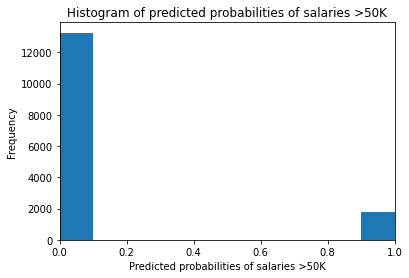

In [30]:
# GB
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 12
plt.hist(y_pred, bins = 10)
plt.title('Histogram of predicted probabilities of salaries >50K')
plt.xlim(0,1)
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

<AxesSubplot:>

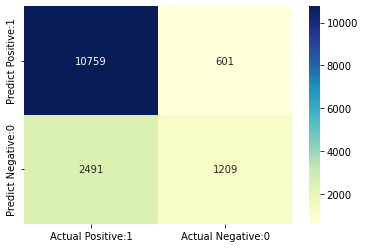

In [31]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')